In [1]:
import sys
sys.path.append("../../..")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from func.iit_tpm import make_tpm, tpm_series, dis_mean
from func.grn_tpm import iit_tpm_cal

def decimal_to_binary(decimal, min_length=1):
    if min_length == 0:
        return ''
    if decimal == 0:
        return "0" if min_length == 1 else "0".zfill(min_length)
    binary = ""
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    # 使用 zfill 确保二进制字符串至少有 min_length 长度
    return binary.zfill(min_length)



bnet = {
    ('A', 'B'): 'w_ab',
    ('B', 'A'): 'w_ba',
    ('A', 'C'): 'w_ac',
    ('C', 'A'): 'w_ca',
    ('B', 'C'): 'w_bc',
    ('C', 'B'): 'w_cb',
    ('A', 'A'): 'w_a',
    ('B', 'B'): 'w_b',
    ('C', 'C'): 'w_c',
    ('E1', 'A'): 'w1a',
    ('E1', 'B'): 'w1b',
    ('E1', 'C'): 'w1c',
    ('E2', 'A'): 'w2a',
    ('E2', 'B'): 'w2b',
    ('E2', 'C'): 'w2c',
}

colors=["#BB4F4F", '#2A69B3', '#74B38F', '#9B76B2', "#B99523", "#27B5AF", "#1E90FF", "#87CEEB"]

# 同时调节k和w

In [8]:
from tqdm import tqdm
n = 50
syn_arr = np.zeros([n, n])
un_sys_arr = np.zeros([n, n])
un_en_arr = np.zeros([n, n])
expand_arr = np.zeros([n, n])
intro_arr = np.zeros([n, n])
w_axis = np.linspace(0, 1, n)
k_axis = np.linspace(0, 16, n)
for w_id,w in tqdm(enumerate(w_axis)):
    w1 = 0.1*(1 - w)
    w2 = 1.9*(1 - w)
    ww = {
        'w_ab': w,
        'w_ba': 0,
        'w_ac': 0,
        'w_ca': w,
        'w_bc': w,
        'w_cb': 0,
        'w_a': w,
        'w_b': w,
        'w_c': w,
        'w1a': w1,
        'w1b': w1,
        'w1c': w1,
        'w2a': w2,
        'w2b': w2,
        'w2c': w2
    }
    for k_id,k in enumerate(k_axis):
        tpm, tpm_v = make_tpm(bnet, ww, k=k)
        un_sys, un_en, syn, expansive, introverted, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2, dis=False) 
        syn_arr[k_id, w_id] = syn
        un_sys_arr[k_id, w_id] = un_sys
        un_en_arr[k_id, w_id] = un_en
        expand_arr[k_id, w_id] = expansive
        intro_arr[k_id, w_id] = introverted



50it [03:08,  3.78s/it]


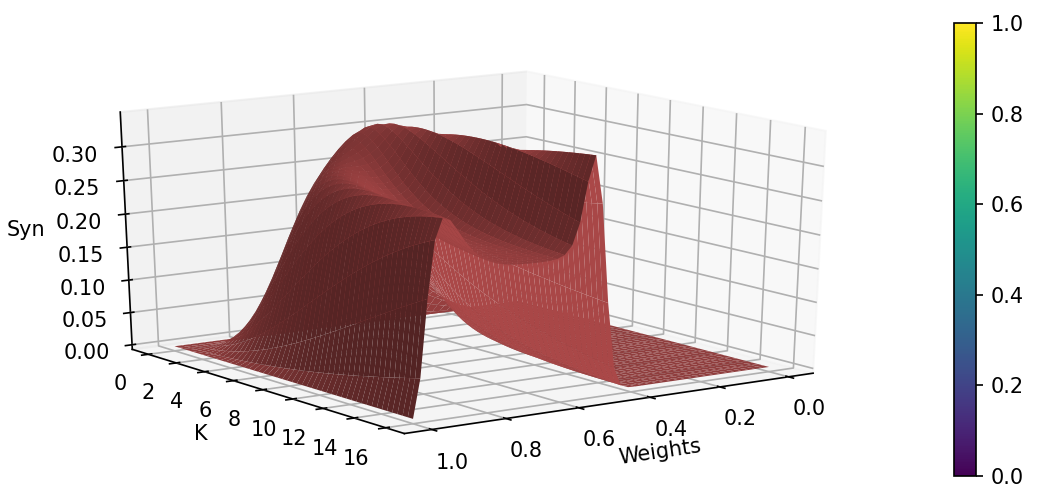

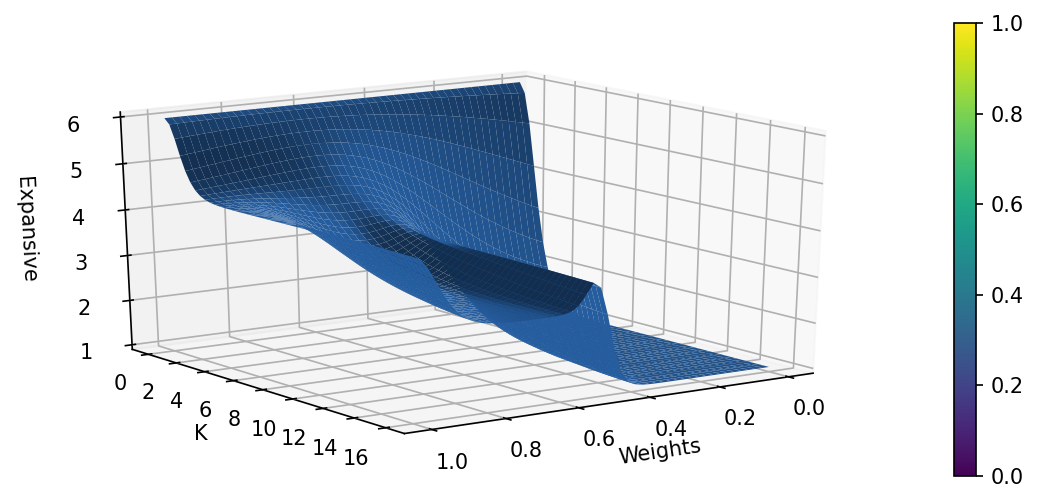

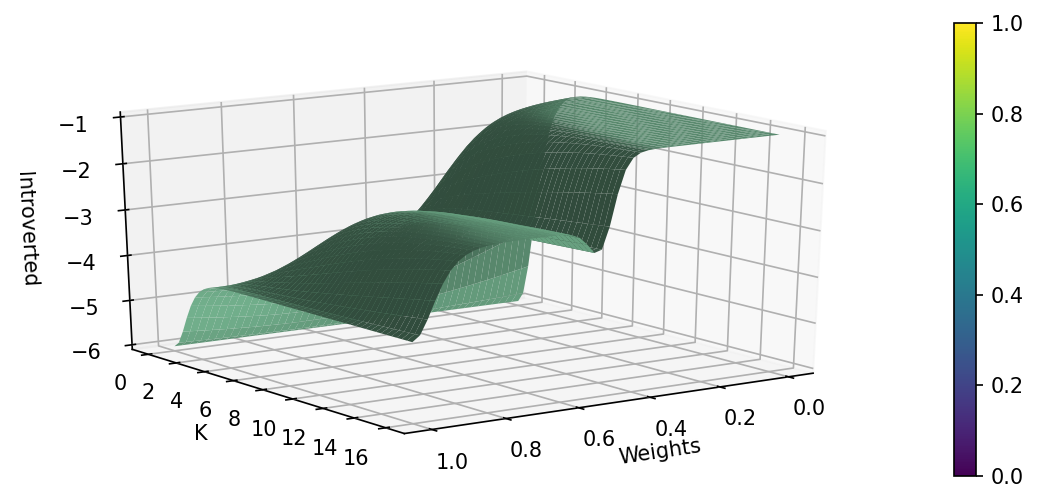

In [9]:

import matplotlib.pyplot as plt
import numpy as np

colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#9B76B2', "#B99523", "#27B5AF", "#1E90FF", "#87CEEB"]

def plot_3d(axis1, axis2, measure, name='', color_index=0):
    # 创建一个新的figure
    fig = plt.figure(figsize=(9.5, 4), dpi=150)
    ax = fig.add_subplot(111, projection='3d')
    data = measure
    X, Y = np.meshgrid(axis1, axis2)
    Z = data
    surf = ax.plot_surface(X, Y, Z, color=colors[color_index])
    fig.colorbar(surf)
    ax.set_xlabel('Weights')
    ax.set_ylabel('K')
    ax.set_zlabel(name)
    ax.view_init(elev=20, azim=55)
    plt.show()
    return

plot_3d(w_axis, k_axis, syn_arr, "Syn", 0)
plot_3d(w_axis, k_axis, expand_arr, "Expansive", 1)
plot_3d(w_axis, k_axis, intro_arr, "Introverted", 2)

# 最佳噪音实验复现

100%|██████████| 50/50 [00:04<00:00, 12.18it/s]


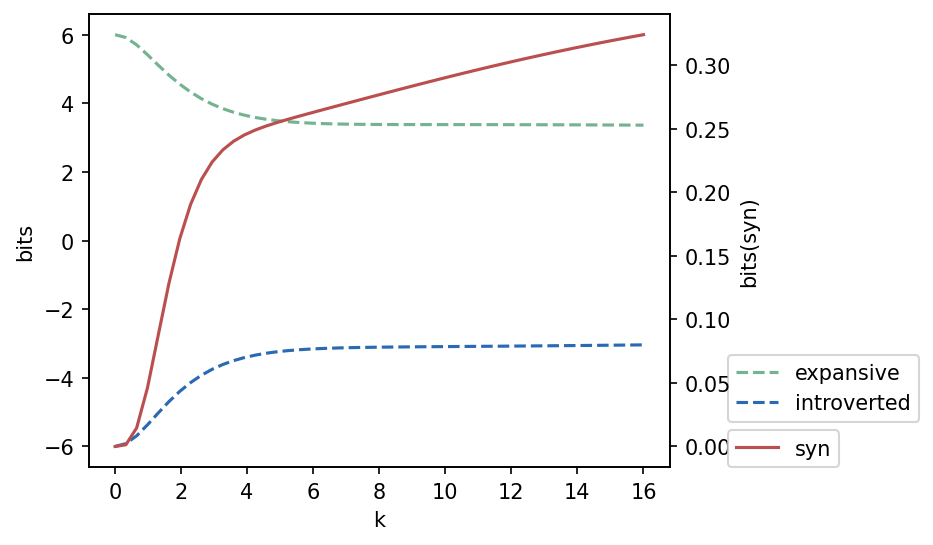

In [11]:
from tqdm import tqdm
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#9B76B2', "#B99523", "#27B5AF", "#1E90FF", "#87CEEB"]
w = 0.5
w1 = 0.1*(1 - w)
w2 = 1.9*(1 - w)
ww = {
    'w_ab': w,
    'w_ba': 0,
    'w_ac': 0,
    'w_ca': w,
    'w_bc': w,
    'w_cb': 0,
    'w_a': w,
    'w_b': w,
    'w_c': w,
    'w1a': w1,
    'w1b': w1,
    'w1c': w1,
    'w2a': w2,
    'w2b': w2,
    'w2c': w2
}

syn_list = []
expan_list = []
intro_list = []
k_axis = np.linspace(0.01, 16, 50)
for k in tqdm(k_axis):
    tpm, tpm_v = make_tpm(bnet, ww, k=k)
    un_sys, un_en, syn, expansive, introverted, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2, dis=False) 
    syn_list.append(syn)
    expan_list.append(expansive)
    intro_list.append(introverted)
    
plt.figure(figsize=(5,4),dpi=150)

# 绘制第一条线，关联到左边的 y 轴
ax1 = plt.gca()  # 获取当前坐标轴
plt.plot(k_axis, expan_list, label='expansive', linestyle="--", color=colors[2])
plt.plot(k_axis, intro_list, label="introverted", linestyle='--', color=colors[1])
plt.legend(loc=[1.1, 0.1])
# 绘制第二条线，关联到右边的 y 轴
ax2 = ax1.twinx()  # 创建与 ax1 共享 x 轴的新坐标轴
plt.plot(k_axis, syn_list, label='syn', color=colors[0])

plt.xlabel('k')

# 设置左边 y 轴的标签
ax1.set_ylabel('bits')  

# 设置右边 y 轴的标签
ax2.set_ylabel('bits(syn)')  
ax1.set_xlabel('k')
ax2.set_xlabel('k')
plt.legend(loc=[1.1, 0])
plt.show()

# 不同系统结构应对环境变化

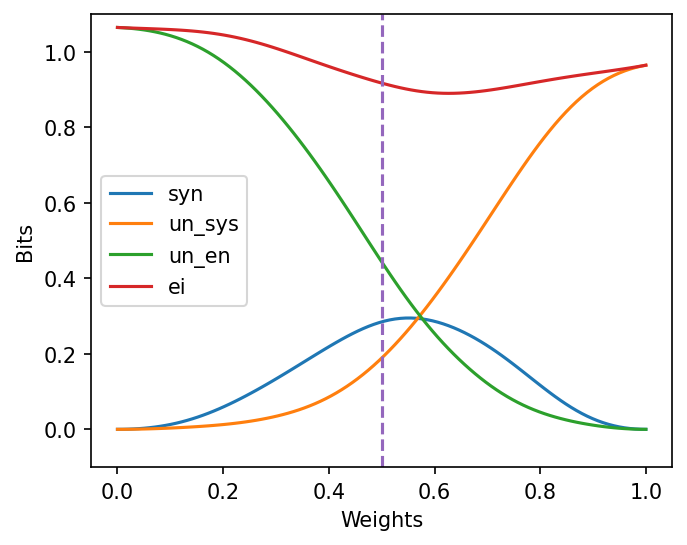

In [20]:
steps = 10
k=2
ei_list = []
syn_list = []
un_sys_list = []
un_en_list = []
w_axis = np.linspace(0, 1, 100)
for w in w_axis:
    w1 = 1 - w 
    w2 = 2 - 2*w
    ww = {
            'w_ab': w,
            'w_ba': w,
            'w_ac': w,
            'w_ca': w,
            'w_bc': w,
            'w_cb': w,
            'w_a': w,
            'w_b': w,
            'w_c': w,
            'w1a': w1,
            'w1b': w1,
            'w1c': w1,
            'w2a': w2,
            'w2b': w2,
            'w2c': w2
        }

    tpm, tpm_v = make_tpm(bnet, ww, k=k)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2) 
    syn_list.append(syn)
    un_sys_list.append(un_sys)
    un_en_list.append(un_en)
    ei_list.append(syn+un_sys+un_en)
    
plt.figure(figsize=(5,4),dpi=150)
plt.plot(w_axis, syn_list, label='syn')
plt.plot(w_axis, un_sys_list, label="un_sys")
plt.plot(w_axis, un_en_list, label="un_en")
plt.plot(w_axis, ei_list, label="ei")
plt.plot([0.5,0.5], [-0.1,1.1], linestyle='--')
plt.ylim([-0.1,1.1])
plt.xlabel('Weights')
plt.ylabel('Bits')
plt.legend()

# plt.figure(figsize=(5,4),dpi=150)
# plt.plot(w_axis, un_sys_list, label="un_sys")
# plt.xlabel('weights')
# plt.ylabel('bits')
# plt.legend()
#un_sys, un_en, syn = serie_plot(bnet, w, k, steps, seeds=1)

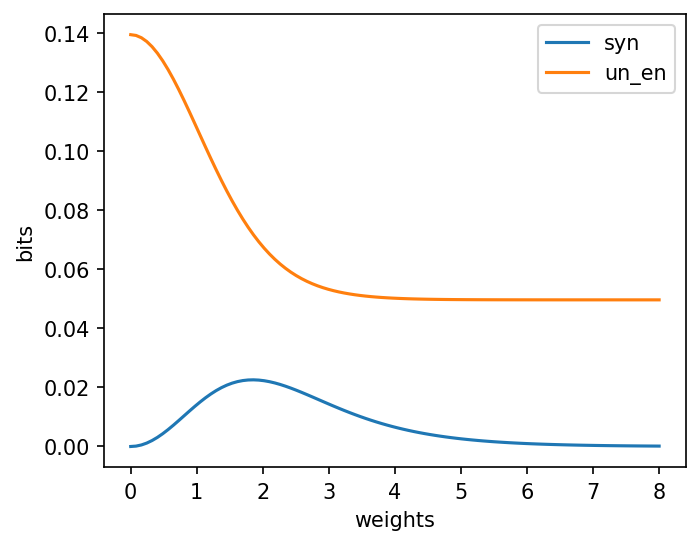

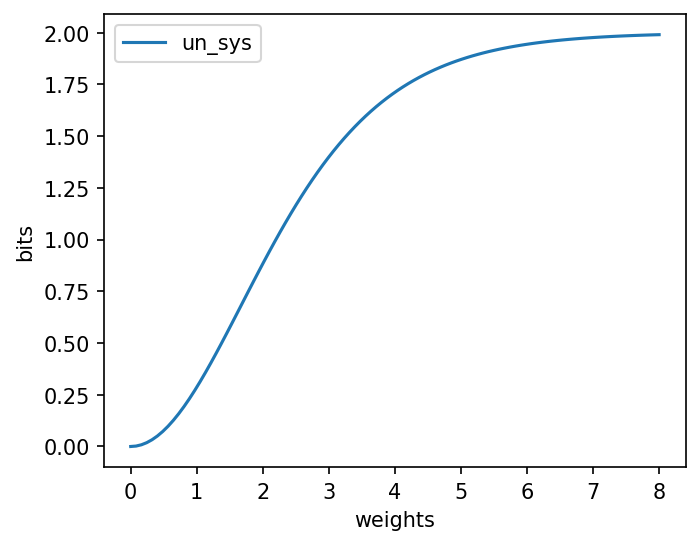

In [33]:
steps = 10
k=1
ww = {
    'w_ab': 0,
    'w_ba': 0,
    'w_ac': 0,
    'w_ca': 0,
    'w_bc': 0,
    'w_cb': 0,
    'w_a': 0,
    'w_b': 0,
    'w_c': 0,
    'w1a': 0.5,
    'w1b': 0.5,
    'w1c': 0.5,
    'w2a': 0.2,
    'w2b': 0.2,
    'w2c': 0.2
}



syn_list = []
un_sys_list = []
un_en_list = []
w_axis = np.linspace(0, 8, 100)
for w in w_axis:
    ww['w_ab'] = w
    ww['w_bc'] = w
#     ww['w_c'] = w
    tpm, tpm_v = make_tpm(bnet, ww, k=k)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2) 
    syn_list.append(syn)
    un_sys_list.append(un_sys)
    un_en_list.append(un_en)
    
plt.figure(figsize=(5,4),dpi=150)
plt.plot(w_axis, syn_list, label='syn')
plt.plot(w_axis, un_en_list, label="un_en")
plt.xlabel('weights')
plt.ylabel('bits')
plt.legend()

plt.figure(figsize=(5,4),dpi=150)
plt.plot(w_axis, un_sys_list, label="un_sys")
plt.xlabel('weights')
plt.ylabel('bits')
plt.legend()

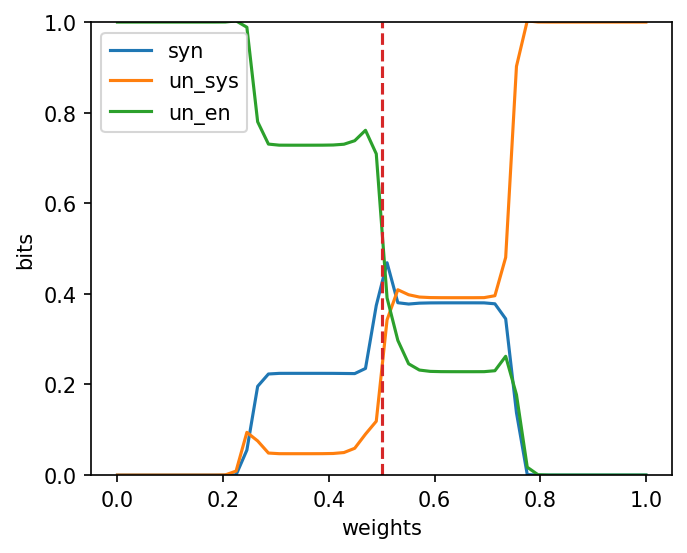

In [173]:
k=40
syn_list = []
un_sys_list = []
un_en_list = []
w_axis = np.linspace(0, 1, 50)
for w in w_axis:
    w1 = 1 - w
    w2 = 2 - 2*w
    ww = {
        'w_ab': w,
        'w_ba': w,
        'w_ac': w,
        'w_ca': w,
        'w_bc': w,
        'w_cb': w,
        'w_a': w,
        'w_b': w,
        'w_c': w,
        'w1a': w1,
        'w1b': w1,
        'w1c': w1,
        'w2a': w2,
        'w2b': w2,
        'w2c': w2
    }
    tpm, tpm_v = make_tpm(bnet, ww, k=k)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2) 
    syn_list.append(syn)
    un_sys_list.append(un_sys)
    un_en_list.append(un_en)
    
plt.figure(figsize=(5,4),dpi=150)
plt.plot(w_axis, syn_list, label='syn')
plt.plot(w_axis, un_sys_list, label="un_sys")
plt.plot(w_axis, un_en_list, label="un_en")
plt.plot([0.5,0.5], [0,1], linestyle='--')
plt.xlabel('weights')
plt.ylabel('bits')
plt.ylim([0,1])
plt.legend()

# plt.figure(figsize=(5,4),dpi=150)
# plt.plot(w_axis, un_sys_list, label="un_sys")
# plt.xlabel('weights')
# plt.ylabel('bits')
# plt.legend()

# 系统与环境规模的变化

In [2]:
bnet5 = {
    ('A', 'B'): 'w_ab',
    ('B', 'A'): 'w_ba',
    ('A', 'C'): 'w_ac',
    ('C', 'A'): 'w_ca',
    ('A', 'D'): 'w_ad',
    ('D', 'A'): 'w_da',
    ('A', 'E'): 'w_ae',
    ('E', 'A'): 'w_ea',
    ('B', 'C'): 'w_bc',
    ('C', 'B'): 'w_cb',
    ('B', 'D'): 'w_bd',
    ('D', 'B'): 'w_db',
    ('B', 'E'): 'w_be',
    ('E', 'B'): 'w_eb',
    ('C', 'D'): 'w_cd',
    ('D', 'C'): 'w_dc',
    ('C', 'E'): 'w_ce',
    ('E', 'C'): 'w_ec',
    ('D', 'E'): 'w_de',
    ('E', 'D'): 'w_ed',
    ('A', 'A'): 'w_a',
    ('B', 'B'): 'w_b',
    ('C', 'C'): 'w_c',
    ('D', 'D'): 'w_d',
    ('E', 'E'): 'w_e',
    ('Q1', 'A'): 'w1a',
    ('Q1', 'B'): 'w1b',
    ('Q1', 'C'): 'w1c',
    ('Q1', 'D'): 'w1d',
    ('Q1', 'E'): 'w1e',
    ('Q2', 'A'): 'w2a',
    ('Q2', 'B'): 'w2b',
    ('Q2', 'C'): 'w2c',
    ('Q2', 'D'): 'w2d',
    ('Q2', 'E'): 'w2e',
    ('Q3', 'A'): 'w3a',
    ('Q3', 'B'): 'w3b',
    ('Q3', 'C'): 'w3c',
    ('Q3', 'D'): 'w3d',
    ('Q3', 'E'): 'w3e',
}

bnet4 = {
    ('A', 'B'): 'w_ab',
    ('B', 'A'): 'w_ba',
    ('A', 'C'): 'w_ac',
    ('C', 'A'): 'w_ca',
    ('A', 'D'): 'w_ad',
    ('D', 'A'): 'w_da',
    ('B', 'C'): 'w_bc',
    ('C', 'B'): 'w_cb',
    ('B', 'D'): 'w_bd',
    ('D', 'B'): 'w_db',
    ('C', 'D'): 'w_cd',
    ('D', 'C'): 'w_dc',
    ('A', 'A'): 'w_a',
    ('B', 'B'): 'w_b',
    ('C', 'C'): 'w_c',
    ('D', 'D'): 'w_d',
    ('Q1', 'A'): 'w1a',
    ('Q1', 'B'): 'w1b',
    ('Q1', 'C'): 'w1c',
    ('Q1', 'D'): 'w1d',
    ('Q2', 'A'): 'w2a',
    ('Q2', 'B'): 'w2b',
    ('Q2', 'C'): 'w2c',
    ('Q2', 'D'): 'w2d',
    ('Q3', 'A'): 'w3a',
    ('Q3', 'B'): 'w3b',
    ('Q3', 'C'): 'w3c',
    ('Q3', 'D'): 'w3d',
}

bnet3 = {
    ('A', 'B'): 'w_ab',
    ('B', 'A'): 'w_ba',
    ('A', 'C'): 'w_ac',
    ('C', 'A'): 'w_ca',
    ('B', 'C'): 'w_bc',
    ('C', 'B'): 'w_cb',
    ('A', 'A'): 'w_a',
    ('B', 'B'): 'w_b',
    ('C', 'C'): 'w_c',
    ('Q1', 'A'): 'w1a',
    ('Q1', 'B'): 'w1b',
    ('Q1', 'C'): 'w1c',
    ('Q2', 'A'): 'w2a',
    ('Q2', 'B'): 'w2b',
    ('Q2', 'C'): 'w2c',
    ('Q3', 'A'): 'w3a',
    ('Q3', 'B'): 'w3b',
    ('Q3', 'C'): 'w3c',
}

In [141]:
n = 50
syn_arr = np.zeros([n, n])
un_sys_arr = np.zeros([n, n])
un_en_arr = np.zeros([n, n])
w_axis = np.linspace(0, 1, n)
k_axis = np.linspace(0, 16, n)
for w_id,w in enumerate(w_axis):
    w2 = 1 - w
    ww = {
        'w_ab': w,
        'w_ba': w,
        'w_ac': w,
        'w_ca': w,
        'w_bc': w,
        'w_cb': w,
        'w_a': w,
        'w_b': w,
        'w_c': w,
        'w1a': w2,
        'w1b': w2,
        'w1c': w2,
        'w2a': w2,
        'w2b': w2,
        'w2c': w2,
        'w3a': w2,
        'w3b': w2,
        'w3c': w2,
    }
    for k_id,k in enumerate(k_axis):
        tpm, tpm_v = make_tpm(bnet3, ww, k=k)
        un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=3) 
        syn_arr[k_id, w_id] = syn
        un_sys_arr[k_id, w_id] = un_sys
        un_en_arr[k_id, w_id] = un_en

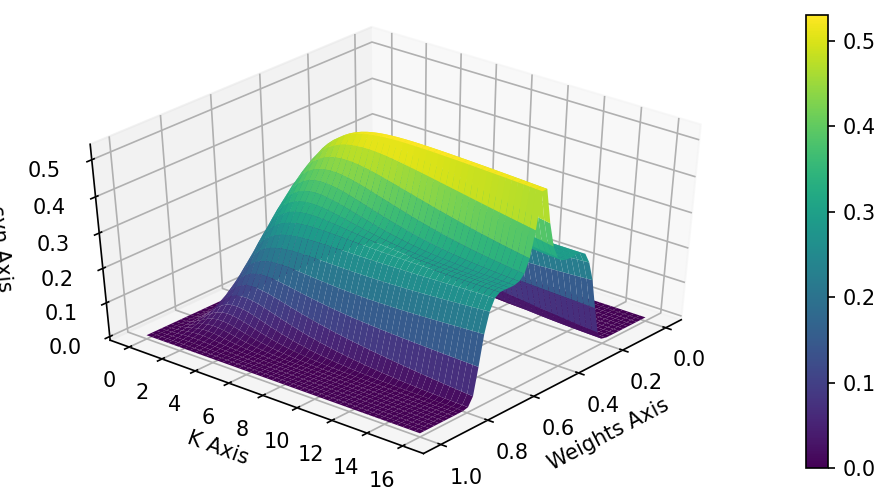

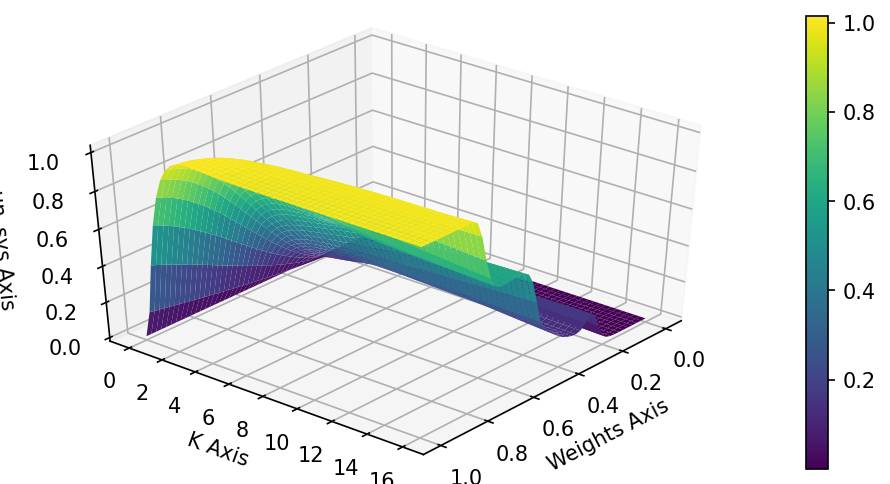

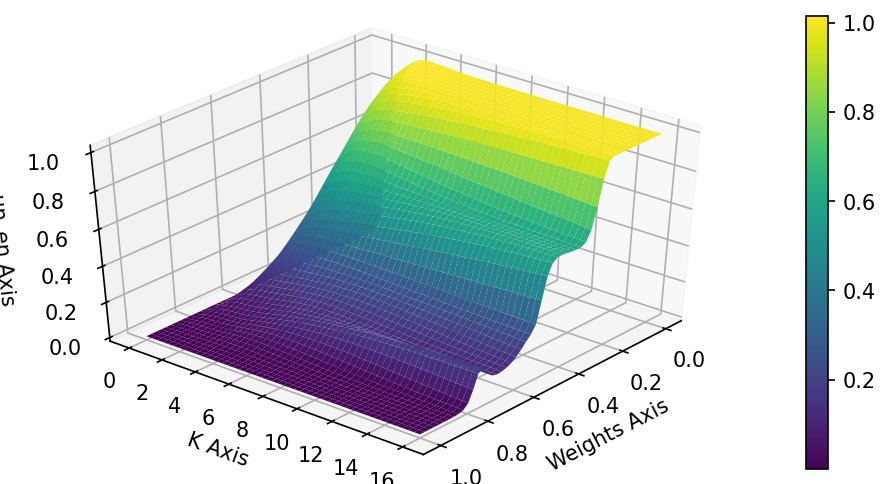

In [142]:
def plot_3d(axis1, axis2, measure, name=''):
    # 创建一个新的figure
    fig = plt.figure(figsize=(8,4), dpi=150)
    ax = fig.add_subplot(111, projection='3d')
    data = measure
    X, Y = np.meshgrid(axis1, axis2)
    Z = data
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    fig.colorbar(surf)
    ax.set_xlabel('Weights Axis')
    ax.set_ylabel('K Axis')
    ax.set_zlabel(name + ' Axis')
    ax.view_init(elev=40, azim=40)
    plt.show()
    return

plot_3d(w_axis, k_axis, syn_arr, "syn")
plot_3d(w_axis, k_axis, un_sys_arr, "un_sys")
plot_3d(w_axis, k_axis, un_en_arr, "un_en")

In [3]:
n = 50
syn_arr = np.zeros([n, n])
un_sys_arr = np.zeros([n, n])
un_en_arr = np.zeros([n, n])
w_axis = np.linspace(0, 1, n)
k_axis = np.linspace(0, 16, n)
for w_id,w in enumerate(w_axis):
    w2 = 1 - w
    ww = {
        'w_ab': w,
        'w_ba': w,
        'w_bc': w,
        'w_cb': w,
        'w_cd': w,
        'w_dc': w,
        'w_da': w,
        'w_ad': w,
        'w_a': w,
        'w_b': w,
        'w_c': w,
        'w_d': w,
        'w1a': w2,
        'w1b': w2,
        'w1c': w2,
        'w1d': w2,
        'w2a': w2,
        'w2b': w2,
        'w2c': w2,
        'w2d': w2,
        'w3a': w2,
        'w3b': w2,
        'w3c': w2,
        'w3d': w2
    }
    for k_id,k in enumerate(k_axis):
        tpm, tpm_v = make_tpm(bnet4, ww, k=k)
        un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=4, en_size=3) 
        syn_arr[k_id, w_id] = syn
        un_sys_arr[k_id, w_id] = un_sys
        un_en_arr[k_id, w_id] = un_en

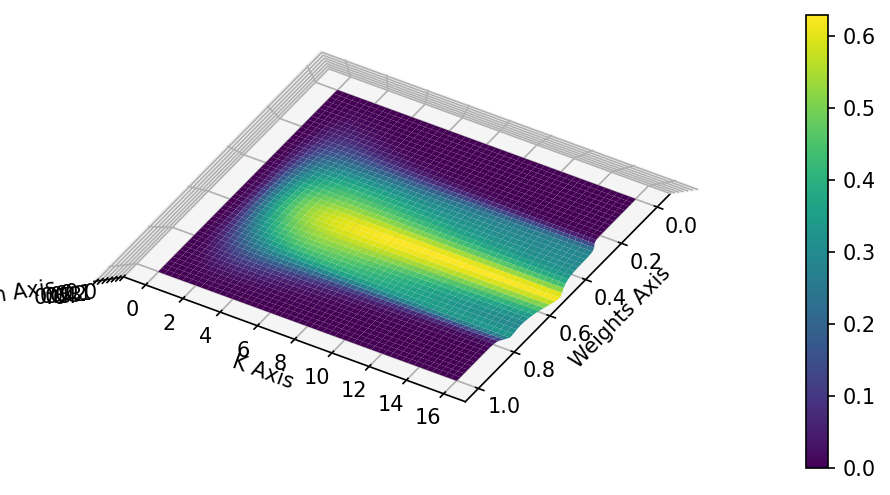

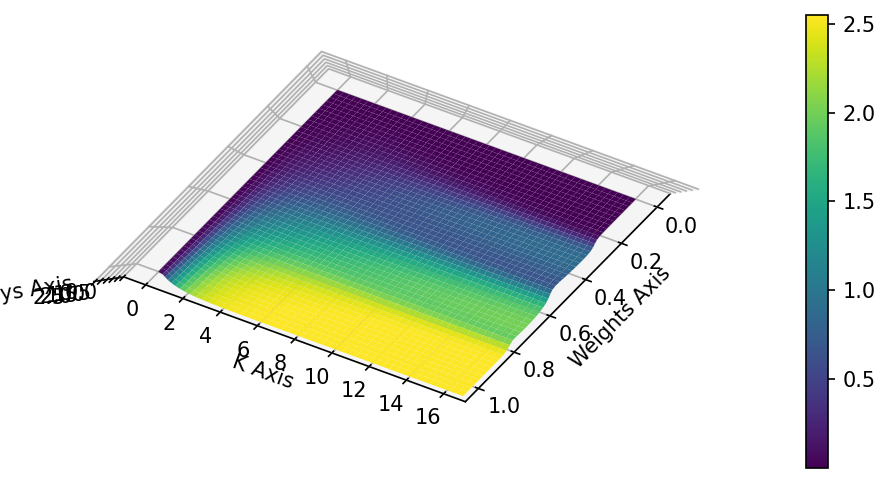

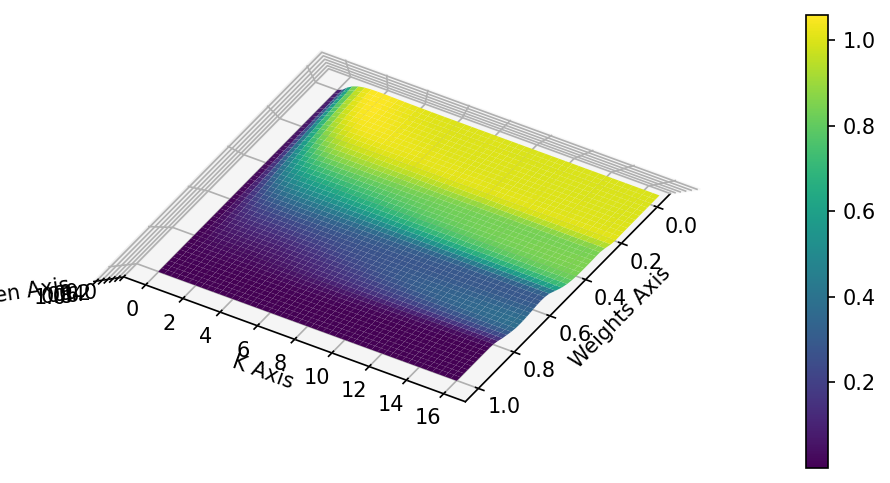

In [6]:
def plot_3d(axis1, axis2, measure, name=''):
    # 创建一个新的figure
    fig = plt.figure(figsize=(8,4), dpi=150)
    ax = fig.add_subplot(111, projection='3d')
    data = measure
    X, Y = np.meshgrid(axis1, axis2)
    Z = data
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    fig.colorbar(surf)
    ax.set_xlabel('Weights Axis')
    ax.set_ylabel('K Axis')
    ax.set_zlabel(name + ' Axis')
    ax.view_init(elev=90, azim=30)
    plt.show()
    return

plot_3d(w_axis, k_axis, syn_arr, "syn")
plot_3d(w_axis, k_axis, un_sys_arr, "un_sys")
plot_3d(w_axis, k_axis, un_en_arr, "un_en")

In [ ]:
n = 50
syn_arr = np.zeros([n, n])
un_sys_arr = np.zeros([n, n])
un_en_arr = np.zeros([n, n])
w_axis = np.linspace(0, 1, n)
k_axis = np.linspace(0, 16, n)
for w_id,w in enumerate(w_axis):
    w2 = 1 - w
    ww = {
        'w_ab': w,
        'w_ba': w,
        'w_bc': w,
        'w_cb': w,
        'w_cd': w,
        'w_dc': w,
        'w_de': w,
        'w_ed': w,
        'w_ea': w,
        'w_ae': w,
        'w_a': w,
        'w_b': w,
        'w_c': w,
        'w_d': w,
        'w_e': w,
        'w1a': w2,
        'w1b': w2,
        'w1c': w2,
        'w1d': w2,
        'w1e': w2,
        'w2a': w2,
        'w2b': w2,
        'w2c': w2,
        'w2d': w2,
        'w2e': w2,
        'w3a': w2,
        'w3b': w2,
        'w3c': w2,
        'w3d': w2,
        'w3e': w2,
    }
    for k_id,k in enumerate(k_axis):
        tpm, tpm_v = make_tpm(bnet5, ww, k=k)
        un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=5, en_size=3) 
        syn_arr[k_id, w_id] = syn
        un_sys_arr[k_id, w_id] = un_sys
        un_en_arr[k_id, w_id] = un_en

In [ ]:
def plot_3d(axis1, axis2, measure, name=''):
    # 创建一个新的figure
    fig = plt.figure(figsize=(8,4), dpi=150)
    ax = fig.add_subplot(111, projection='3d')
    data = measure
    X, Y = np.meshgrid(axis1, axis2)
    Z = data
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    fig.colorbar(surf)
    ax.set_xlabel('Weights Axis')
    ax.set_ylabel('K Axis')
    ax.set_zlabel(name + ' Axis')
    #ax.view_init(elev=30, azim=30)
    plt.show()
    return

plot_3d(w_axis, k_axis, syn_arr, "syn")
plot_3d(w_axis, k_axis, un_sys_arr, "un_sys")
plot_3d(w_axis, k_axis, un_en_arr, "un_en")

# 梯径分析序列

In [3]:
import string

# 获取所有小写字母
lowercase_letters = list(string.ascii_lowercase)

# 获取所有大写字母
uppercase_letters = list(string.ascii_uppercase)

# 合并两个列表
all_letters = lowercase_letters + uppercase_letters



In [7]:
lens = 2000
init_state = '00111'
tpm1, tpm_v1 = make_tpm(bnet, w1, k=1)
for seed in range(3):
    serie, _ = tpm_series(tpm_v1, init_state, lens, seed)
    letter_list = [all_letters[i] for i in serie]
    with open('w1_'+init_state+'_'+str(seed)+'.txt', 'w') as f:
            f.write(''.join(letter_list))


In [8]:

tpm2, tpm_v2 = make_tpm(bnet, w2, k=1)
for seed in range(3):
    serie, _ = tpm_series(tpm_v2, init_state, lens, seed)
    letter_list = [all_letters[i] for i in serie]
    with open('w2_'+init_state+'_'+str(seed)+'.txt', 'w') as f:
            f.write(''.join(letter_list))